# Energies for the Schrödinger equation in a well with a potential

In [14]:
from __future__ import division
from sympy import *
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plt, mpld3
from matplotlib import rcParams
from scipy.linalg import eigh
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20

init_printing()

In [15]:
x = symbols('x')

In [16]:
def approx_sol(num, approx_type='poly'):
    """Compute the trial function using polynomials or sines
    
    Parameters
    ----------
    num : int
        Number of terms in the expansion.
        
    Returns
    -------
    u_n : Sympy expression
        Trial function for the given basis.
    c : (num) Sympy symbols list
        List of coefficients.
        
    """    
    c = symbols('c0:%d'%num)
    if approx_type=='poly':
        u_n = x*(1 - x)*sum([c[k]*x**k for k in range(num)])
    if approx_type=='sine':
        u_n = sum([c[k]*sin((k + 1)*x) for k in range(num)])
        
    return u_n, c

In [17]:
def functs(u, V, x, x0, x1):
    """Functional for a given trial function
    
    Parameters
    ----------
    u : Sympy expression
        Approximant solution.
    x : Sympy symbol
        Independent variable.
    
    Returns
    -------
    J : Sympy expression
        Functional for the given approximant function.
    
    """
    Hint = expand(S(1)/2*(diff(u,x))**2 + V*u**2)
    Hf = integrate(Hint, (x, x0, x1))
    Sf = integrate(expand(u**2), (x, x0, x1))
    return Hf, Sf

In [18]:
n = 5
u_n, c = approx_sol(n, 'sine')

In [19]:
Hf, Sf = functs(u_n, x*(2*pi - x), x, 0, 2*pi)

In [20]:
Hmat = Matrix(n, n, lambda i,j: diff(Hf, c[i], c[j]) )

In [21]:
Mmat = Matrix(n, n, lambda i,j: diff(Sf, c[i], c[j]) )

In [22]:
vals, vecs = eigh(np.array(Hmat).astype(float), b=np.array(Mmat).astype(float))

In [23]:
vals

array([  5.72324464,   9.04413044,  11.55005606,  14.95945642,  19.85359933])

In [24]:
x_vec = np.linspace(0, 2*np.pi, 201)
efuns = [sum(vecs[j, k]*np.sin((j+1)*x_vec) for j in range(n)) for k in range(n)]

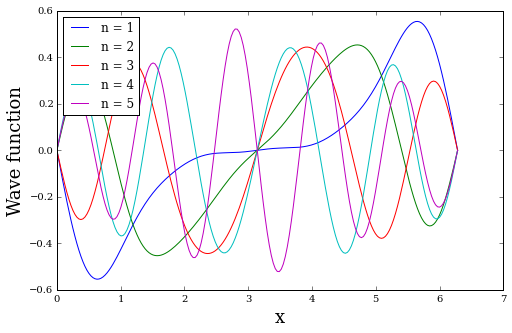

In [25]:
%matplotlib inline
mpld3.enable_notebook()

plt.figure(figsize=(8,5))
for k in range(n):
    plt.plot(x_vec, efuns[k], label="n = %i"%(k+1))
    
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("Wave function");

In [26]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()